In [41]:
from jax import numpy as jnp
import matplotlib.pyplot as plt

In [3]:
def ReLU(preactivation):
    return jnp.maximum(0, preactivation)

# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = jnp.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(jnp.matmul(beta_0,jnp.ones((1,n_data))) + jnp.matmul(omega_0,x))
    y = jnp.matmul(beta_1,jnp.ones((1,n_data))) + jnp.matmul(omega_1,h1)
    return y

In [7]:
def get_parameters():
    # And we'll create a network that approximately fits it
    beta_0 = jnp.zeros((3,1))  # formerly theta_x0
    omega_0 = jnp.zeros((3,1))  # formerly theta_x1
    beta_1 = jnp.zeros((1,1))  # formerly phi_0
    omega_1 = jnp.zeros((1,3))  # formerly phi_x

    beta_0 = beta_0.at[0,0].set(0.3)
    beta_0 = beta_0.at[1,0].set(-1.0)
    beta_0 = beta_0.at[2,0].set(-0.5)
    omega_0 = omega_0.at[0,0].set(-1.0)
    omega_0 = omega_0.at[1,0].set(1.8)
    omega_0 = omega_0.at[2,0].set(0.65)
    beta_1 = beta_1.at[0,0].set(0.1)
    omega_1 = omega_1.at[0,0].set(-2.0)
    omega_1 = omega_1.at[0,1].set(-1.0)
    omega_1 = omega_1.at[0,2].set(7.0)

    return beta_0, omega_0, beta_1, omega_1

In [8]:
def plot_univariate_regression(x_model, y_model, x_data = None, y_data = None, sigma_model = None, title= None):
    # Make sure model data are 1D arrays
    x_model = jnp.squeeze(x_model)
    y_model = jnp.squeeze(y_model)

    fig, ax = plt.subplots()
    ax.plot(x_model,y_model)
    if sigma_model is not None:
        ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')
    ax.set_xlabel(r'Input, '); ax.set_ylabel(r'Output, ')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    if title is not None:
        ax.set_title(title)
    if x_data is not None:
        ax.plot(x_data, y_data, 'ko')
    plt.show()


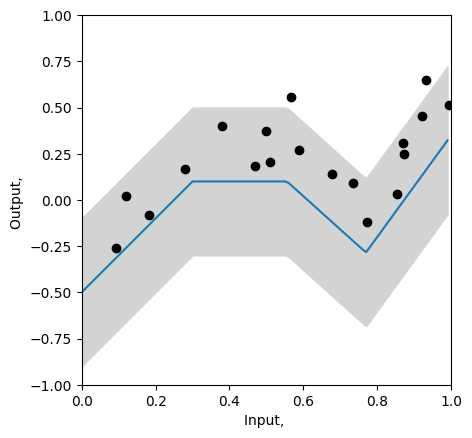

In [9]:

# Let's create some 1D training data
x_train = jnp.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,
                     0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,
                     0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,
                     0.87168699,0.58858043])
y_train = jnp.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,
                     0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,
                     0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444,
                     0.248038840,0.26824970])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2

# Define a range of input values
x_model = jnp.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma)

In [17]:
def normal_distribution(y, mu, sigma):
    prob = (1/(jnp.sqrt(2*jnp.pi*(sigma**2))))*jnp.exp(-((y-mu)**2)/(2*(sigma**2)))
    return prob

In [18]:
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.119,normal_distribution(1,-1,2.3)))

Correct answer = 0.119, Your answer = 0.119


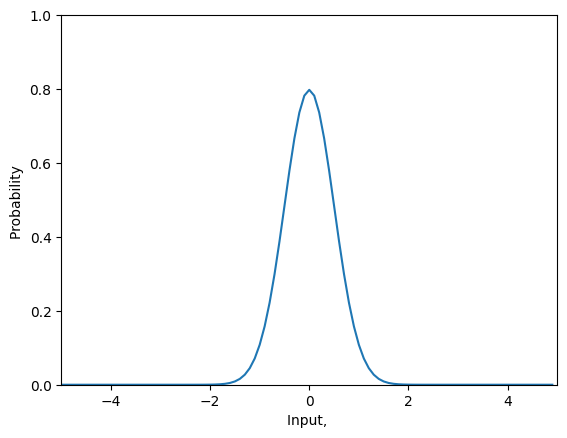

In [22]:
y_gauss = jnp.arange(-5,5,0.1)
mu = 0; sigma = 0.5
gauss_prob = normal_distribution(y_gauss, mu, sigma)
fig, ax = plt.subplots()
ax.plot(y_gauss, gauss_prob)
ax.set_xlabel(r'Input, '); ax.set_ylabel(r'Probability ')
ax.set_xlim([-5,5]);ax.set_ylim([0,1.0])
plt.show()

In [25]:
def compute_likelihood(y_train, mu, sigma):
    return jnp.prod(normal_distribution(y_train, mu, sigma))

In [26]:
# Let's test this for a homoscedastic (constant sigma) model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Set the standard deviation to something reasonable
sigma = 0.2
# Compute the likelihood
likelihood = compute_likelihood(y_train, mu_pred, sigma)
# Let's double-check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000010624,likelihood))

Correct answer = 0.000010624, Your answer = 0.000010624


In [27]:
def compute_negative_log_likelihood(y_train, mu, sigma):
    return -jnp.sum(jnp.log(normal_distribution(y_train, mu, sigma)))

In [28]:

# Let's test this for a homoscedastic (constant sigma) model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Set the standard deviation to something reasonable
sigma = 0.2
# Compute the negative log likelihood
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(11.452419564,nll))

Correct answer = 11.452419564, Your answer = 11.452424049


In [29]:
def compute_sum_of_squares(y_train, y_pred):
    return jnp.sum((y_train - y_pred)**2)

In [30]:

# Let's test this again
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian, which is out best prediction of y
y_pred = mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Compute the sum of squares
sum_of_squares = compute_sum_of_squares(y_train, y_pred)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(2.020992572,sum_of_squares))


Correct answer = 2.020992572, Your answer = 2.020992756


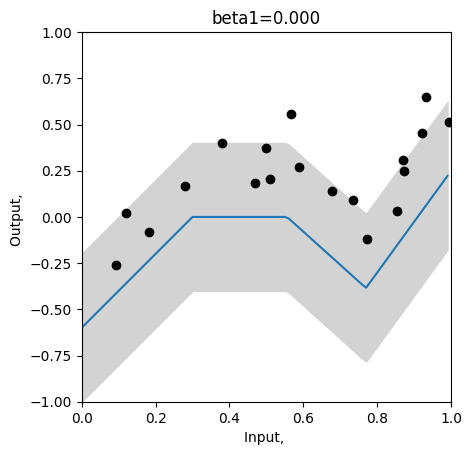

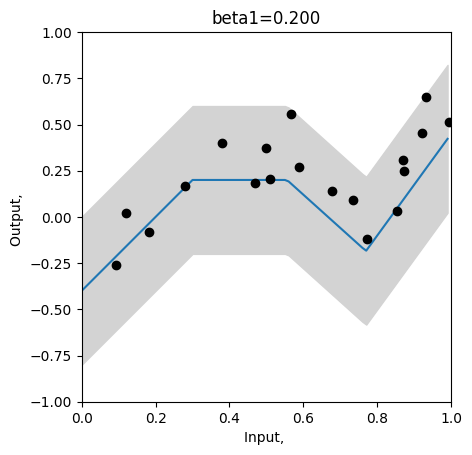

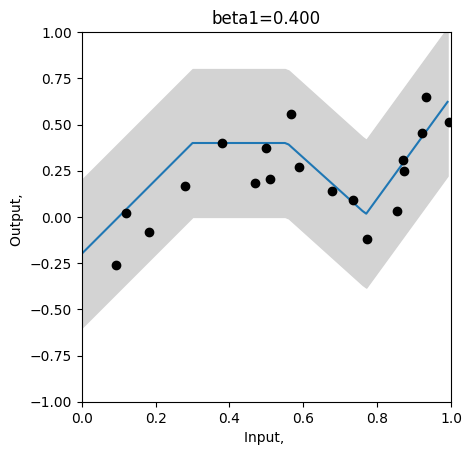

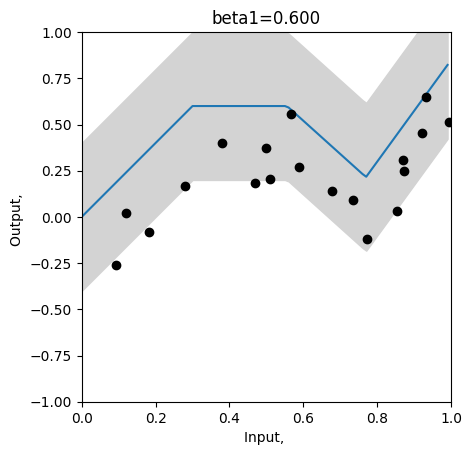

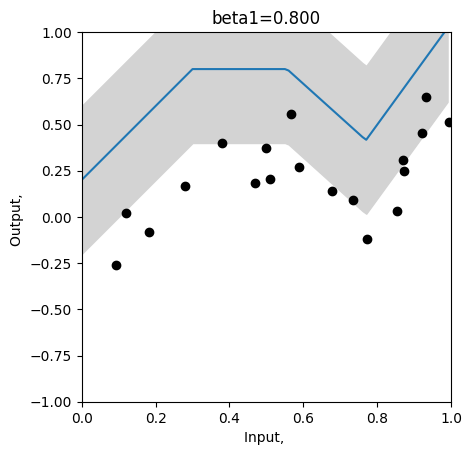

In [32]:

# Define a range of values for the parameter
beta_1_vals = jnp.arange(0,1.0,0.01)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = jnp.zeros_like(beta_1_vals)
nlls = jnp.zeros_like(beta_1_vals)
sum_squares = jnp.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2
for count in range(len(beta_1_vals)):
    # Set the value for the parameter
    beta_1 = beta_1.at[0, 0].set(beta_1_vals[count])
    # Run the network with new parameters
    mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
    # Compute and store the three values
    likelihoods =likelihoods.at[count].set(compute_likelihood(y_train, mu_pred, sigma))
    nlls = nlls.at[count].set(compute_negative_log_likelihood(y_train, mu_pred, sigma))
    sum_squares = sum_squares.at[count].set(compute_sum_of_squares(y_train, y_pred))
    # Draw the model for every 20th parameter setting
    if count % 20 == 0:
        # Run the model to get values to plot and plot it.
        y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
        plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))

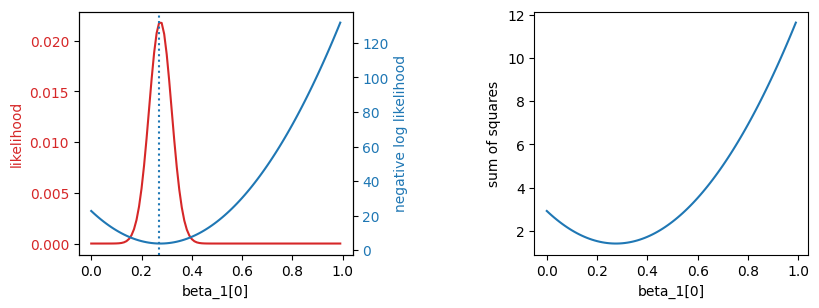

In [34]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax[0].set_xlabel('beta_1[0]')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(beta_1_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(beta_1_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[jnp.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(beta_1_vals, sum_squares); ax[1].set_xlabel('beta_1[0]'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.022, at beta_1=0.270
Minimum negative log likelihood = 3.826, at beta_1=0.270
Least squares = 1.411, at beta_1=0.270


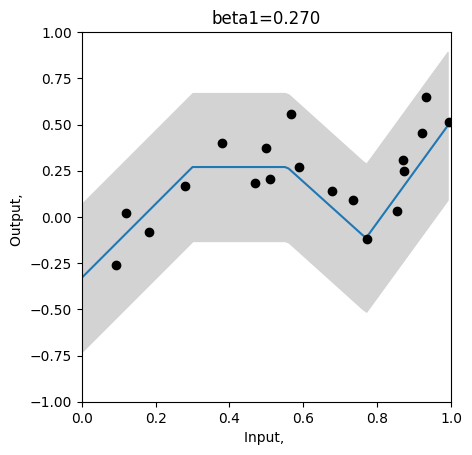

In [36]:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[jnp.argmax(likelihoods)],beta_1_vals[jnp.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[jnp.argmin(nlls)],beta_1_vals[jnp.argmin(nlls)])))
print("Least squares = %3.3f, at beta_1=%3.3f"%( (sum_squares[jnp.argmin(sum_squares)],beta_1_vals[jnp.argmin(sum_squares)])))

# Plot the best model
beta_1 =  beta_1.at[0, 0].set(beta_1_vals[jnp.argmin(sum_squares)])
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))



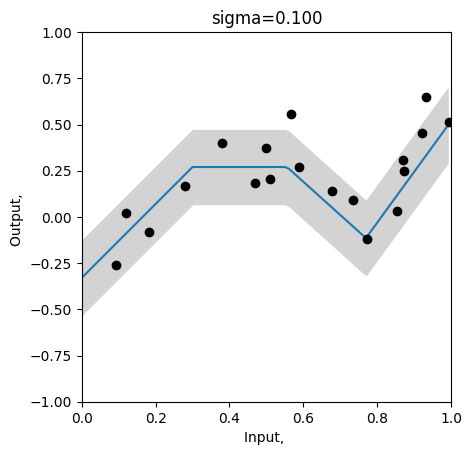

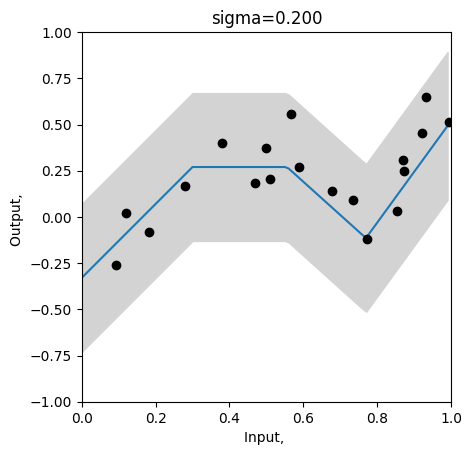

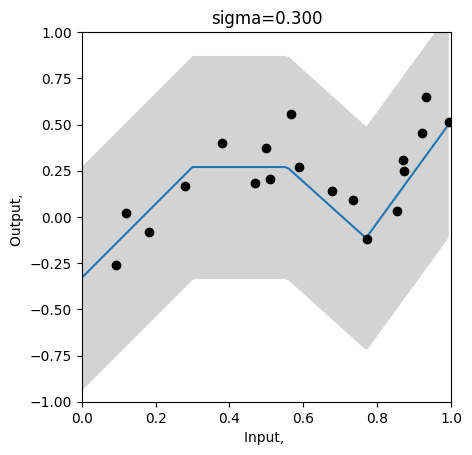

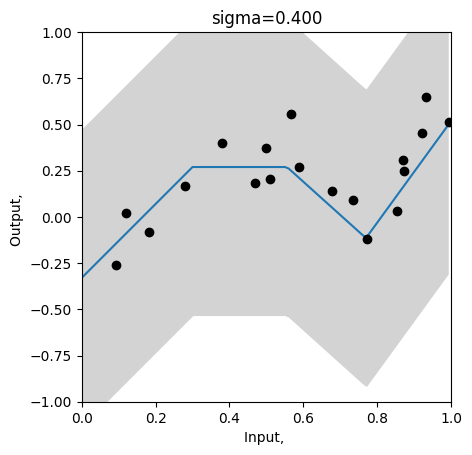

In [37]:
# Define a range of values for the parameter
sigma_vals = jnp.arange(0.1,0.5,0.005)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = jnp.zeros_like(sigma_vals)
nlls = jnp.zeros_like(sigma_vals)
sum_squares = jnp.zeros_like(sigma_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Might as well set to the best offset
beta_1 = beta_1.at[0, 0].set( 0.27)
for count in range(len(sigma_vals)):
    # Set the value for the parameter
    sigma = sigma_vals[count]
    # Run the network with new parameters
    mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
    # Compute and store the three values
    likelihoods = likelihoods.at[count].set(compute_likelihood(y_train, mu_pred, sigma))
    nlls = nlls.at[count].set(compute_negative_log_likelihood(y_train, mu_pred, sigma))
    sum_squares = sum_squares.at[count].set(compute_sum_of_squares(y_train, y_pred))
    # Draw the model for every 20th parameter setting
    if count % 20 == 0:
        # Run the model to get values to plot and plot it.
        y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
        plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma, title="sigma=%3.3f"%(sigma))



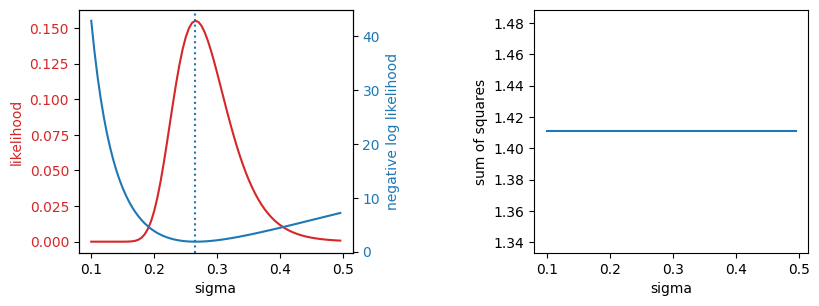

In [38]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the standard deviation sigma
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax[0].set_xlabel('sigma')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(sigma_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(sigma_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = sigma_vals[jnp.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(sigma_vals, sum_squares); ax[1].set_xlabel('sigma'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.155, at sigma=0.265
Minimum negative log likelihood = 1.864, at sigma=0.265


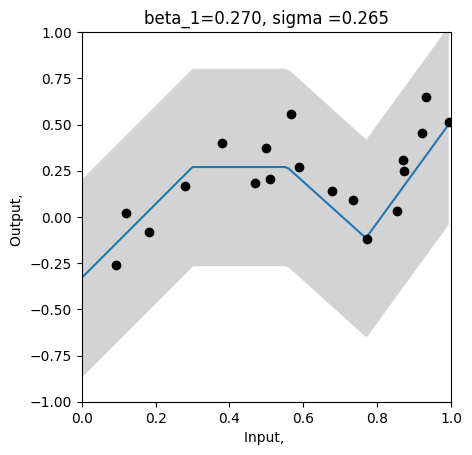

In [40]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# The least squares solution does not depend on sigma, so it's just flat -- no use here.
# Let's check that:
print("Maximum likelihood = %3.3f, at sigma=%3.3f"%( (likelihoods[jnp.argmax(likelihoods)],sigma_vals[jnp.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at sigma=%3.3f"%( (nlls[jnp.argmin(nlls)],sigma_vals[jnp.argmin(nlls)])))
# Plot the best model
sigma= sigma_vals[jnp.argmin(nlls)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta_1=%3.3f, sigma =%3.3f"%(beta_1[0,0],sigma))

